# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [54]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats.mstats import normaltest
from statsmodels.stats.weightstats import ztest
import statsmodels.stats.api as sms
from scipy import stats

df = pd.read_csv('human_body_temperature.csv')

In [55]:
# Your work here.

In [56]:
df.head(10)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


# Question 1

Is the distribution of body temperatures normal? • Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population. 


In [57]:
normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

Using pearson's test - this distribution is normal. The p-value of .26 is much larger than the standard p-value limit of .05, so we cannot reject the null hypothesis. Our distribution is normal.

Checking visually to confirm: 

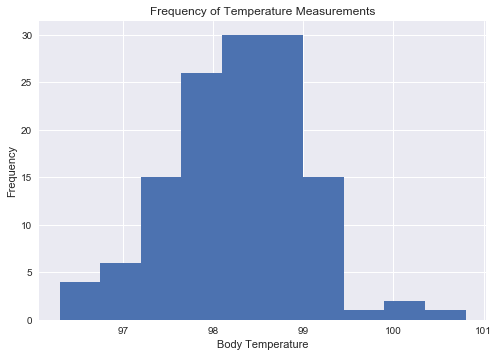

In [124]:
#Temperature Dist
figT=plt.figure()

ax=figT.add_subplot(1,1,1)
ax.hist(df['temperature'])

plt.title('Frequency of Temperature Measurements')
plt.xlabel('Body Temperature')
plt.ylabel('Frequency')
plt.show()

# Question 2


Is the sample size large? Are the observations independent? • Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 


In [59]:
df.describe

<bound method NDFrame.describe of      temperature gender  heart_rate
0           99.3      F        68.0
1           98.4      F        81.0
2           97.8      M        73.0
3           99.2      F        66.0
4           98.0      F        73.0
5           99.2      M        83.0
6           98.0      M        71.0
7           98.8      M        78.0
8           98.4      F        84.0
9           98.6      F        86.0
10          98.8      F        89.0
11          96.7      F        62.0
12          98.2      M        72.0
13          98.7      F        79.0
14          97.8      F        77.0
15          98.8      F        83.0
16          98.3      F        79.0
17          98.2      M        64.0
18          97.2      F        68.0
19          99.4      M        70.0
20          98.3      F        78.0
21          98.2      M        71.0
22          98.6      M        70.0
23          98.4      M        68.0
24          97.8      M        65.0
25          98.0      F       

In [60]:
mean = df.temperature.mean()
print (mean)

98.24923076923078


In [61]:
standardDeviation = df.temperature.std()
print (standardDeviation)

0.7331831580389454


The samples are independent as they are seperate measurements and each one does not affect the probability of another. 

There are not as many samples as we'd hope to extrapolate to the entire human population, but it's serviceable. 

Another challenge in having so few readings is the question of randomness. Ideally, these readings would be a random pick of 130 people out of the billions and billions on planet earth. It was most likely, however, just a portion of people avaiable to the reasearchers - one specific subset of one geographic area. 

That being said, we have more than enough samples to do a two-sample z-test with some power. (The general rule of 
thumb on those tests being a 30 sample minimum.)

# Question 3

Is the true population mean really 98.6 degrees F?
Would you use a one-sample or two-sample test? Why? In this situation, is it appropriate to use the t or z score? 
Now try using the other test. How is the result be different? Why? 


We should start with a one-sample t-test. 

We need a one sample test, because we are comparing a sample to the overall population. 

We can perform a z-test since we have enough samples (>30), and the distribution tested normal. 

The challenge here, however, is that we don't know the population's standard deviation. We are assuming that the standard deviation is normal based on the samples that we have taken testing normal, but that might not be the case. 

The t-test would be the safest approach, so that's what we'll start with: 

In [62]:
stats.ttest_1samp(df.temperature,98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

Using this testing tool, we can see that the p-value is extremely small. p = .00000024
Very low.
That means that we can reject the null hypothesis that the population mean body temperature is 98.6 degrees. 

Let's try a z-test: 

In [63]:
ztest(df.temperature,value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

Again we have a very low result, even lower than the t-test so we can reject the null hypothesis that the population mean body temp is 98.6. 

These test are different since they are making different assumptions. The t-test is not assuming that the sample size is normal, while the z-test is. The result are variations in p. 

# Question 4

At what temperature should we consider someone's temperature to be "abnormal"? 
Start by computing the margin of error and confidence interval. 


In [74]:
#Here we are using the critical value of 1.96 - which is 95% confidence interval 
criticalValue = 1.96
standardError = standardDeviation / np.sqrt(len(df.temperature))
marginError = criticalValue * standardError
print (marginError)

0.126036657002


This gives a margin of error of about 12.6%

In [72]:
#Calculating the 95% confidence interval
sms.DescrStatsW(df.temperature).tconfint_mean(alpha=0.05, alternative='two-sided')

(98.122002905608028, 98.376458632853499)

In [75]:
stats.norm.interval(.95,loc=mean,scale=standardError)

(98.123196428181657, 98.375265110279898)

Above we've used two methods to calculate the confidence interval. This gives us the upper and lower bounds of 98.12 and 98.37.

# Question 5

Is there a significant difference between males and females in normal temperature?
What test did you use and why? 

We'll complete a two-sample hypothesis test in order to compare the means here. First, we'll make lists with just the male and female data. 

In [89]:
maleTemperatures = np.array(df.temperature[df.gender=='M'])

In [90]:
femaleTemperatures = np.array(df.temperature[df.gender=='F'])

In [92]:
#Now we test 
#We will use a t-test to be safe. 
stats.ttest_ind(maleTemperatures,femaleTemperatures)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

The p value of .024 is lower than the usual .05 so we will reject the null hypothesis of males and females having the 
same mean body temperature. 

In [95]:
#Let's try a z-test
ztest(maleTemperatures,femaleTemperatures)

(-2.2854345381656103, 0.02228736076065755)

Still reject the null. 

In [119]:
dfFemale = df[df['gender'] == 'F']

In [120]:
dfFemale.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


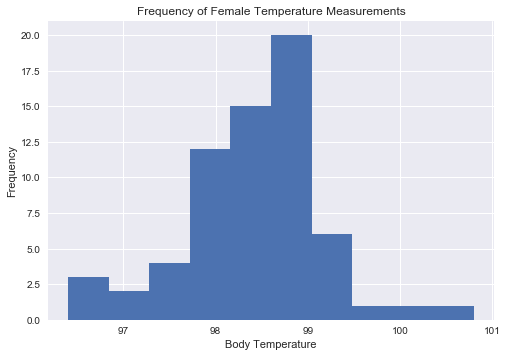

In [121]:
#Temperature Dist for Females
figT=plt.figure()

ax=figT.add_subplot(1,1,1)
ax.hist(dfFemale['temperature'])

plt.title('Frequency of Female Temperature Measurements')
plt.xlabel('Body Temperature')
plt.ylabel('Frequency')
plt.show()

In [117]:
dfMale = df[df['gender'] == 'M']
dfMale.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


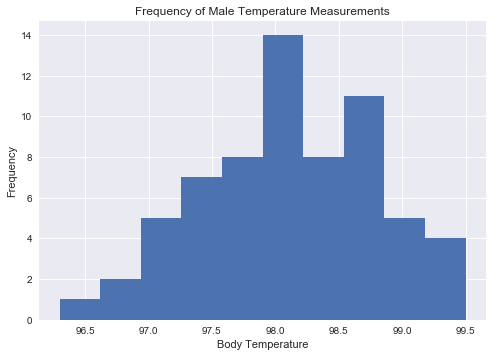

In [123]:
#Temperature Dist for Males
figT=plt.figure()

ax=figT.add_subplot(1,1,1)
ax.hist(dfMale['temperature'])

plt.title('Frequency of Male Temperature Measurements')
plt.xlabel('Body Temperature')
plt.ylabel('Frequency')
plt.show()

Women have a slightly higher body temperature. This may have something to do with females having more fat on their bodies as a percentage of total body mass. Men tend to have more muscle, which is not as insulating. 